# Basic Things to remember Before CNN Training 

In [ ]:
# Convolution Neural Networks
# Rotate kernals on i/p image to generate feature maps
# Kernal --> Feature extractor , image modifier, filters etc
# In cnn back propagation also happens in kernals so they are not static they are dynamic
# But CNN are more efficient than ANN as their we have less paramertes to train, no effect of translation invarience etc 
# In CNN we need to keep in mind about 
  # Image Size 
  # Image Augmentation 
  # Kernal(Filters) 
  # Pooling 
  # Padding 
  # Batch Normalization
  # Dropout 
  # stride
  # optimizer
  # No of layers
  # Flatten 
  # Different Types of Networks Architectures (lenet, alexnet, googlenet, Vgg16 , resnet )


# Mode 
# Valid -- > o/p size n-k+1
# same ---> n
# full ---> n+k-1


# Hyperparameters 
 # Inputsize
 # kernal size 
 # pooling 
 # stride 
 # hidden layers 
 # dense layer 
 # learning rate 
 # ++

# Guidelines 
  # Start with small filters or stick with 3*3
  # Repeat patterns (conv + pool repeat)
  # Increase feature map 
  # read papers
  
# Type of cnn 
  # Pure
  # mixed 

In [ ]:
# Necessary Imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as f
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('fivethirtyeight')

## Download and Load Data

In [ ]:
train_data = datasets.FashionMNIST(
    root='Data',
    train=True,
    download = True,
    transform = transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root='Data',
    train=False,
    download = True,
    transform = transforms.ToTensor(),
    target_transform = None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
label_map = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3:' Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot',
}

Text(0.5, 0, 'T-shirt/top')

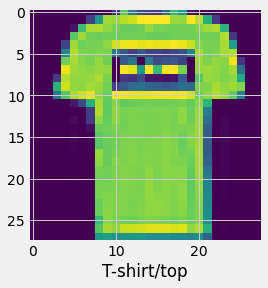

In [ ]:
plt.imshow(train_data.data[1])
plt.xlabel(label_map[train_data.targets[1].item()])

In [ ]:
# Lets create data loader 
# Loader will transform and rescale data automaticaly + reshape 
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=64,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                               batch_size=64,
                               shuffle=False)

In [ ]:
for x in test_data_loader:
  print(x[0].shape)
  print(x[1].shape)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])


## Cnn model Creation with Image size calculation 


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class Neural_Network(nn.Module):
  def __init__(self,input,output):
    super(Neural_Network,self).__init__()
    self.layer1 = nn.Conv2d(in_channels=input,out_channels=64,kernel_size=(3,3),stride=1,padding=(1,1))   # Input(28,28) -- Output(28,28)
    self.pool1= nn.MaxPool2d(kernel_size=2)                                                               # Input(28,28) -- Output(14,14)
    self.layer2 = nn.Conv2d(in_channels=64,out_channels=32,kernel_size=(3,3),stride=1,padding=(1,1))      # Input(14,14) -- Output(14,14)
    self.pool2 = nn.MaxPool2d(kernel_size=2)                                                              # Input  (14,14) -- Output(7,7)
    self.layer3 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3),stride=1,padding=(0,0))      # Input  (7,7)   -- Output(5,5)
    self.layer4 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3),stride=1,padding=(0,0))      # Input  (5,5)   -- Output(3,3)

    self.flatten = nn.Flatten()
    self.dense1 = nn.Linear(3*3*32,64)
    self.dropout = nn.Dropout()
    self.dense2 = nn.Linear(64,output)

  def forward(self,x):
    x = f.relu(self.layer1(x))
    x = self.pool1(x)
    x = f.relu(self.layer2(x))
    x = self.pool2(x)
    x = f.relu(self.layer3(x))
    x = f.relu(self.layer4(x))
    x = self.flatten(x)
    x = f.relu(self.dense1(x))
    x = self.dropout(x)
    x = f.relu(self.dense2(x))
    return x

In [ ]:
device

'cuda'

In [ ]:
model = Neural_Network(1,10)
model.to(device)

Neural_Network(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (layer4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=288, out_features=64, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (dense2): Linear(in_features=64, out_features=10, bias=True)
)

# Total Trainable parameters 

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model)

+---------------+------------+
|    Modules    | Parameters |
+---------------+------------+
| layer1.weight |    576     |
|  layer1.bias  |     64     |
| layer2.weight |   18432    |
|  layer2.bias  |     32     |
| layer3.weight |    9216    |
|  layer3.bias  |     32     |
| layer4.weight |    9216    |
|  layer4.bias  |     32     |
| dense1.weight |   18432    |
|  dense1.bias  |     64     |
| dense2.weight |    640     |
|  dense2.bias  |     10     |
+---------------+------------+
Total Trainable Params: 56746


56746

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

def train_(n_epoch=5,train_data_loader=None,test_data_loader=None,criterion=None,optimizer=None,model=None):
    train_loss = []
    test_loss = []
    for epoch in range(n_epoch):
      model.train()
      for batch,data in enumerate(train_data_loader):
        x = data[0].to(device)
        y = data[1].to(device)
        
        optimizer.zero_grad()

        y_pred = model(x)
        loss = criterion(y_pred,y)
        loss.backward()
        optimizer.step()
      
      model.eval()

      for batch,data in enumerate(test_data_loader):
        with torch.no_grad():
          x  = data[0].to(device)
          y = data[1].to(device)
      
          y_pred = model(x)
          loss_ = criterion(y_pred,y)

      train_loss.append(loss.item()) 
      test_loss.append(loss_.item()) 
      print(f' Epoch {epoch+1}/{n_epoch} Train Loss {loss:.4f}  Test Loss {loss_:.4f}') 
    return train_loss, test_loss


train_loss, test_loss = train_(10,train_data_loader,test_data_loader,criterion,optimizer,model)

 Epoch 1/10 Train Loss 0.2183  Test Loss 0.1233
 Epoch 2/10 Train Loss 0.3579  Test Loss 0.3909
 Epoch 3/10 Train Loss 0.1049  Test Loss 0.1583
 Epoch 4/10 Train Loss 0.0776  Test Loss 0.2127
 Epoch 5/10 Train Loss 0.3716  Test Loss 0.2355
 Epoch 6/10 Train Loss 0.5247  Test Loss 0.5508
 Epoch 7/10 Train Loss 0.4370  Test Loss 0.3662
 Epoch 8/10 Train Loss 0.1838  Test Loss 0.6223
 Epoch 9/10 Train Loss 0.3309  Test Loss 0.3638
 Epoch 10/10 Train Loss 0.2401  Test Loss 0.1404


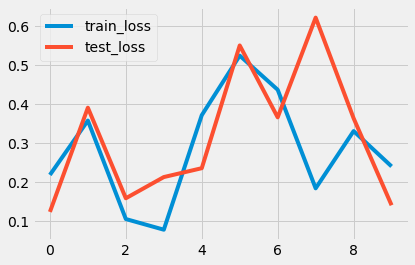

In [ ]:
pd.DataFrame(data={'train_loss':train_loss,'test_loss':test_loss}).plot()

In [ ]:
# Lets Evaluate Model 
# Accuracy Calculation 
model.eval()
for batch, data in enumerate(train_data_loader):
  with torch.no_grad():
     x = data[0].to(device)
     y = data[1].to(device)
     y_pred = model.forward(x)
     print((torch.argmax(y_pred,axis=1) == y))
     break

tensor([ True,  True,  True, False,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
